  <img src="../figures/logo-esi-sba.png" width="700" height="126" align="center" alt="Logo">

# Book recommendation system
*Prepared by* 
- Benghenima Hafsa (h.benghenima@esi-sba.dz) 
- Ghandouz Amina (a.ghandouz@esi-sba.dz) 
- Benahmed Firdaws (f.benahmed@esi-sba.dz) 

## Notebook1 : Data cleaning

### packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [3]:
df = pd.read_csv("../data/cleaned_df.csv")
books_df = pd.read_csv("../data/books.csv")
ratings_df = pd.read_csv("../data/ratings.csv")

C:\Users\hafsa\AppData\Local\Temp\ipykernel_13192\1324141084.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv("../data/books.csv")


### visualization the dataset before preprocessing

### visualization the dataset after preprocessing

In [34]:
df.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...
1,276744,038550120X,7,A Painted House
2,276747,0060517794,9,Little Altars Everywhere
3,276747,0671537458,9,Waiting to Exhale
4,276747,0679776818,8,Birdsong: A Novel of Love and War


In [35]:
df.tail()

,User-ID,ISBN,Book-Rating,Book-Title
321073,276704,0345386108,6,Winter Moon
321074,276704,0743211383,7,Dreamcatcher
321075,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...
321076,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback))
321077,276721,0590442449,10,Fourth Grade Rats


In [36]:
df.shape

(321078, 4)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321078 entries, 0 to 321077
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      321078 non-null  int64 
 1   ISBN         321078 non-null  object
 2   Book-Rating  321078 non-null  int64 
 3   Book-Title   321078 non-null  object
dtypes: int64(2), object(2)
memory usage: 9.8+ MB


In [38]:
pd.set_option('display.float_format', '{:,.2f}'.format)
df.describe()

,User-ID,Book-Rating
count,"321,078.00","321,078.00"
mean,"135,580.21",8.23
std,"80,519.08",1.27
min,8.00,6.00
25%,"67,354.00",7.00
50%,"132,572.00",8.00
75%,"206,219.00",9.00
max,"278,854.00",10.00


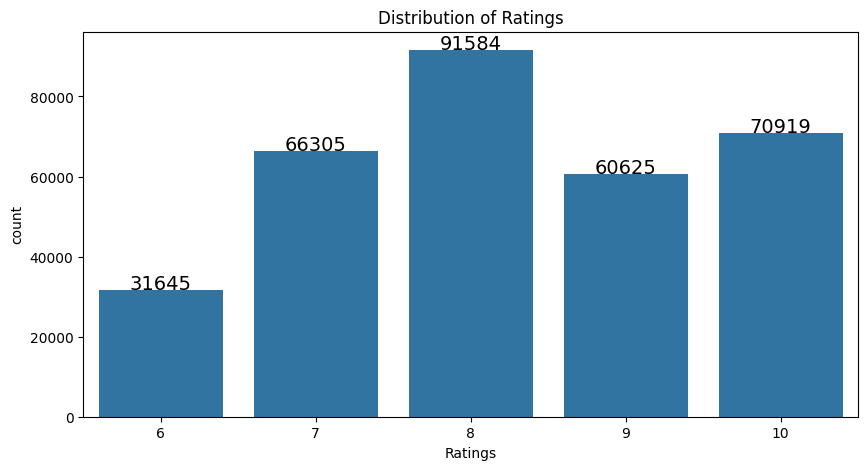

In [39]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x='Book-Rating')
labels = (df['Book-Rating'].value_counts().sort_index())
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')

for i,v in enumerate(labels):
    ax.text(i, v+100, str(v), horizontalalignment='center', size=14, color='black')
plt.show()

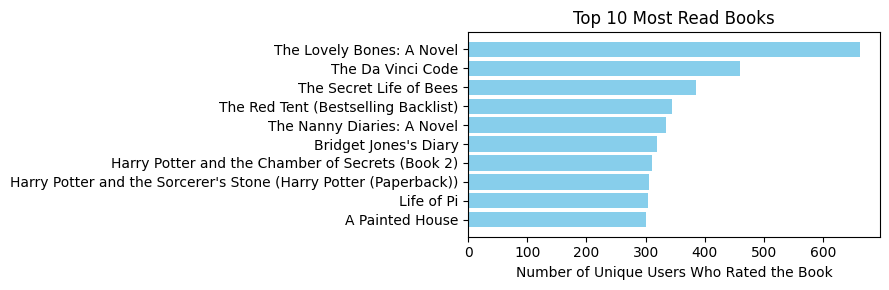

In [40]:
most_read_books = df.groupby('Book-Title')['User-ID'].nunique().reset_index(name='userCount')
most_read_books_sorted = most_read_books.sort_values('userCount', ascending=False)
top_100_books = most_read_books_sorted.head(10)

plt.figure(figsize=(9, 3))
plt.barh(top_100_books['Book-Title'][::-1], top_100_books['userCount'][::-1], color='skyblue')
plt.xlabel('Number of Unique Users Who Rated the Book')
plt.title('Top 10 Most Read Books')

plt.tight_layout()
plt.show()

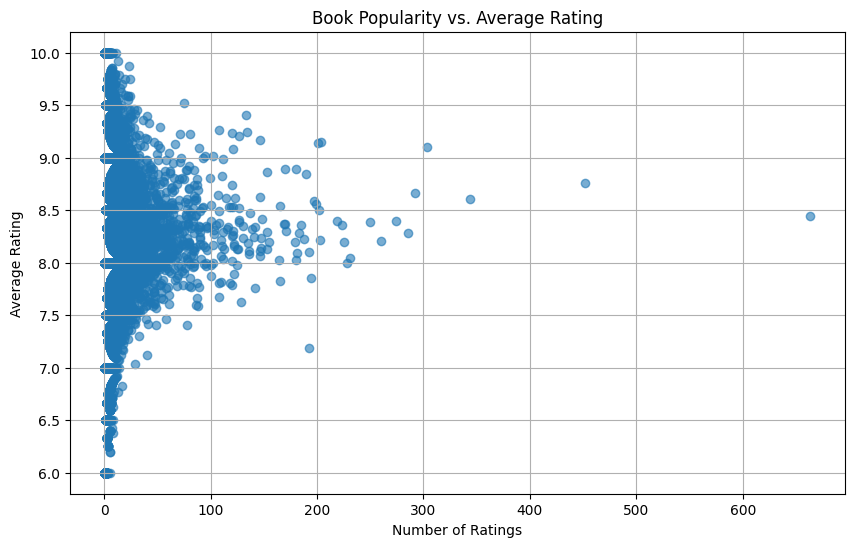

In [41]:
import pandas as pd

# Assuming df is your DataFrame with 'book_id', 'user_id', and 'rating'
book_stats = df.groupby('ISBN').agg(
    avg_rating=('Book-Rating', 'mean'),
    num_ratings=('Book-Rating', 'count')
).reset_index()

import matplotlib.pyplot as plt

# Scatter plot: num_ratings on x-axis, avg_rating on y-axis
plt.figure(figsize=(10, 6))
plt.scatter(book_stats['num_ratings'], book_stats['avg_rating'], alpha=0.6)
plt.title('Book Popularity vs. Average Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()
